# Generating image data
In this notebook we use [bia-bob](https://github.com/haesleinhuepf/bia-bob) to generate code for us that generates image data.
Such simulated images might be useful for testing image processing algorithms on images with specified characteristics.

In [1]:
import os
from bia_bob import bob
bob.initialize(endpoint='https://llm.scads.ai/v1', model='openai/gpt-oss-120b', api_key=os.environ.get('SCADSAI_API_KEY'))

In [2]:
%%bob 
Write a for-loop that generates 256x256 sized numpy arrays / images.
The images should contain blurry bright objects on dark background.
The more objects are in the images, the smaller the sigma for the Gaussian blur.
The relationship between number of objects and sigma is exponential.

I will create a loop that builds a series of 256 × 256 NumPy images containing bright spots on a dark background.  
For each image I will:

1. Randomly pick a number of objects.  
2. Draw those objects as small disks (radius = 2 px) with intensity = 1.  
3. Compute a Gaussian‑blur sigma that **decreases exponentially** with the number of objects (`sigma = sigma0 * exp(-k·N)`).  
4. Apply `scipy.ndimage.gaussian_filter` to obtain the final blurry image.  

All generated images are stored in a list called `images`.



In [4]:
import numpy as np
from scipy.ndimage import gaussian_filter
from skimage.draw import disk
# import stackview   # uncomment to visualise results

# ----------------------------------------------------------------------
# Parameters
# ----------------------------------------------------------------------
img_shape = (256, 256)          # image size
object_counts = np.arange(5, 55, 5)   # 5,10,...,50 objects per image
sigma0 = 8.0                    # sigma when only a few objects are present
k = 0.08                        # exponential decay factor (tune to taste)
radius = 2                      # radius of the bright spots (in pixels)

images = []                     # list that will hold the generated images
metadata = []                   # optional: keep (Nobjects, sigma) for each image

for N in object_counts:
    # ---- 1. create empty canvas ---------------------------------------
    img = np.zeros(img_shape, dtype=np.float32)

    # ---- 2. add N random bright disks ---------------------------------
    for _ in range(N):
        # random centre, stay inside the image borders
        cx = np.random.randint(radius, img_shape[0] - radius)
        cy = np.random.randint(radius, img_shape[1] - radius)
        rr, cc = disk((cx, cy), radius, shape=img_shape)
        img[rr, cc] = 1.0          # bright intensity

    # ---- 3. compute sigma (exponential relation) ---------------------
    sigma = sigma0 * np.exp(-k * N)

    # ---- 4. blur the image -------------------------------------------
    blurred = gaussian_filter(img, sigma=sigma)

    # ---- 5. store -----------------------------------------------------
    images.append(blurred)
    metadata.append((N, sigma))

# ----------------------------------------------------------------------
# Example visualisation (uncomment if you have stackview installed)
# ----------------------------------------------------------------------
# import matplotlib.pyplot as plt
# fig, axs = plt.subplots(1, len(images), figsize=(15, 3))
# for ax, im, (N, sigma) in zip(axs, images, metadata):
#     ax.imshow(im, cmap='gray')
#     ax.set_title(f"N={N}\nsigma={sigma:.2f}")
#     ax.axis('off')
# plt.tight_layout()
# plt.show()

C:\Users\rober\miniforge3\envs\bio11\Lib\site-packages\stackview\_animate.py:41: UserWarning: The timelapse has a small intensity range between 0 and 1. Consider normalizing it to the range between 0 and 255.
  warnings.warn("The timelapse has a small intensity range between 0 and 1. Consider normalizing it to the range between 0 and 255.")



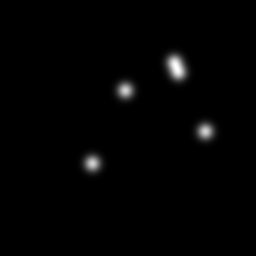

In [6]:
import stackview
stackview.animate(images)